# Gender Recognition from Images

The goal of this project is to try to use a supervised machine learning model (SVM, kNN, and random forest) to determine if we can accurately classify genders of people based on photos. This dataset came from the Kaggle Gender Recognizer dataset: https://www.kaggle.com/datasets/humairmunir/gender-recognizer

## Load and Preprocess Images

In [4]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV

In [5]:
# Set paths to image folders
men_images_path = "dataset/MEN"
women_images_path = "dataset/WOMAN"

In [6]:
def load_images(folder, label):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.resize(img, (64, 64))  # Resize to 64x64
            images.append(img.flatten())    # Flatten the image into a feature vector
            labels.append(label)
    return images, labels

In [7]:
# Load images
men_images, men_labels = load_images(men_images_path, "Male")
women_images, women_labels = load_images(women_images_path, "Female")

In [8]:
# Combine datasets
X = np.array(men_images + women_images)
y = np.array(men_labels + women_labels)

In [9]:
# Encode labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [10]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Feature Engineering

In [12]:
# Normalize data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Train Models

### SVM

In [15]:
# Train SVM
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

In [16]:
# Evaluate SVM
svm_predictions = svm_model.predict(X_test)
print("SVM Performance:")
print(classification_report(y_test, svm_predictions, target_names=label_encoder.classes_))

SVM Performance:
              precision    recall  f1-score   support

      Female       0.68      0.66      0.67       128
        Male       0.68      0.70      0.69       131

    accuracy                           0.68       259
   macro avg       0.68      0.68      0.68       259
weighted avg       0.68      0.68      0.68       259



In [17]:
# Define the parameter grid for SVM
svm_param_grid = {
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'gamma': ['scale', 'auto'],  # Kernel coefficient
}

In [18]:
# Initialize GridSearchCV for SVM
svm_grid = GridSearchCV(SVC(), svm_param_grid, cv=5, scoring='accuracy')
svm_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']},
             scoring='accuracy')

In [19]:
# Best parameters and score
print("Best Parameters for SVM:", svm_grid.best_params_)
print("Best SVM Accuracy:", svm_grid.best_score_)

Best Parameters for SVM: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best SVM Accuracy: 0.7434548098119226


In [20]:
# Evaluate on test set
svm_best = svm_grid.best_estimator_
svm_predictions = svm_best.predict(X_test)
print("SVM Test Performance:")
print(classification_report(y_test, svm_predictions, target_names=label_encoder.classes_))

SVM Test Performance:
              precision    recall  f1-score   support

      Female       0.77      0.77      0.77       128
        Male       0.77      0.78      0.78       131

    accuracy                           0.77       259
   macro avg       0.77      0.77      0.77       259
weighted avg       0.77      0.77      0.77       259



### kNN

In [22]:
# Train k-NN
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [23]:
knn_predictions = knn_model.predict(X_test)
print("k-NN Performance:")
print(classification_report(y_test, knn_predictions, target_names=label_encoder.classes_))

k-NN Performance:
              precision    recall  f1-score   support

      Female       0.64      0.59      0.61       128
        Male       0.62      0.67      0.65       131

    accuracy                           0.63       259
   macro avg       0.63      0.63      0.63       259
weighted avg       0.63      0.63      0.63       259



In [24]:
# Define the parameter grid for k-NN
knn_param_grid = {
    'n_neighbors': list(range(1,51)),  # Number of neighbors
    'weights': ['uniform', 'distance'],  # Weighting method
    'metric': ['euclidean', 'manhattan', 'minkowski'],  # Distance metric
}

In [25]:
# Initialize GridSearchCV for k-NN
knn_grid = GridSearchCV(KNeighborsClassifier(), knn_param_grid, cv=5, scoring='accuracy')
knn_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [26]:
# Best parameters and score
print("Best Parameters for k-NN:", knn_grid.best_params_)
print("Best k-NN Accuracy:", knn_grid.best_score_)

Best Parameters for k-NN: {'metric': 'manhattan', 'n_neighbors': 39, 'weights': 'distance'}
Best k-NN Accuracy: 0.7318324656442006


In [27]:
# Evaluate on test set
knn_best = knn_grid.best_estimator_
knn_predictions = knn_best.predict(X_test)
print("k-NN Test Performance:")
print(classification_report(y_test, knn_predictions, target_names=label_encoder.classes_))

k-NN Test Performance:
              precision    recall  f1-score   support

      Female       0.76      0.62      0.69       128
        Male       0.69      0.81      0.74       131

    accuracy                           0.72       259
   macro avg       0.73      0.72      0.72       259
weighted avg       0.72      0.72      0.72       259



### Random Forest

In [29]:
# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [30]:
# Evaluate Random Forest
rf_predictions = rf_model.predict(X_test)
print("Random Forest Performance:")
print(classification_report(y_test, rf_predictions, target_names=label_encoder.classes_))

Random Forest Performance:
              precision    recall  f1-score   support

      Female       0.75      0.75      0.75       128
        Male       0.76      0.76      0.76       131

    accuracy                           0.75       259
   macro avg       0.75      0.75      0.75       259
weighted avg       0.75      0.75      0.75       259



In [31]:
# Define the parameter grid for Random Forests
rf_param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees
    'criterion': ['gini', 'entropy'],  # Splitting criteria
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum samples to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum samples at a leaf node
}

In [32]:
# Initialize GridSearchCV for Random Forests
rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_param_grid, cv=5, scoring='accuracy')
rf_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [33]:
# Best parameters and score
print("Best Parameters for Random Forest:", rf_grid.best_params_)
print("Best Random Forest Accuracy:", rf_grid.best_score_)

Best Parameters for Random Forest: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Best Random Forest Accuracy: 0.7492096993574411


In [34]:
# Evaluate on test set
rf_best = rf_grid.best_estimator_
rf_predictions = rf_best.predict(X_test)
print("Random Forest Test Performance:")
print(classification_report(y_test, rf_predictions, target_names=label_encoder.classes_))

Random Forest Test Performance:
              precision    recall  f1-score   support

      Female       0.73      0.74      0.73       128
        Male       0.74      0.73      0.73       131

    accuracy                           0.73       259
   macro avg       0.73      0.73      0.73       259
weighted avg       0.73      0.73      0.73       259



## Compare Models

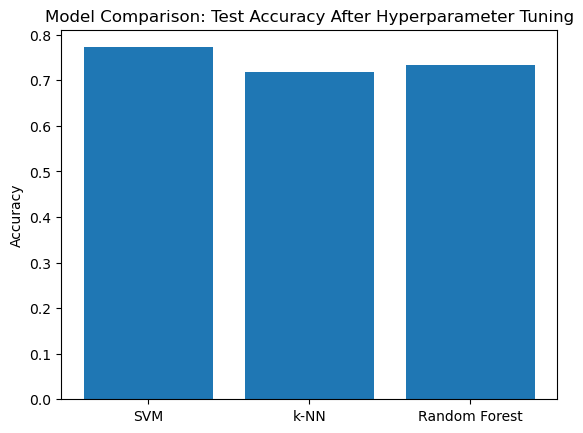

In [36]:
# Calculate test accuracies
svm_test_accuracy = svm_best.score(X_test, y_test)
knn_test_accuracy = knn_best.score(X_test, y_test)
rf_test_accuracy = rf_best.score(X_test, y_test)

# Visualize
models = ['SVM', 'k-NN', 'Random Forest']
test_accuracies = [svm_test_accuracy, knn_test_accuracy, rf_test_accuracy]

plt.bar(models, test_accuracies)
plt.title("Model Comparison: Test Accuracy After Hyperparameter Tuning")
plt.ylabel("Accuracy")
plt.show()

From the bar chart, we can see that the SVM model performed the best with an accuracy of 77%.